In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

---

## **1. Introduction to Optimization and Loss Functions**

Optimization is the process of adjusting the parameters of a model to minimize or maximize a function (often a loss function in machine learning). The goal is to find the "best" model parameters that minimize the error on the given data.

### **What is a Loss Function?**

A loss function quantifies how well the model's predictions match the true values. The goal of optimization is to minimize this loss function.

For a simple linear regression model, the loss function is typically the **Mean Squared Error (MSE)**.

---

### **Loss Function: Mean Squared Error (MSE)**

The formula for MSE is:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ is the true value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the number of data points.

---

### **Example 1: Calculate MSE for Simple Data**

Let’s calculate the MSE for a simple example:


In [2]:
# Example Data
y_true = np.array([3, -0.5, 2, 7])  # True values
y_pred = np.array([2.5, 0.0, 2, 8])  # Predicted values


# Compute Mean Squared Error
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


mse = compute_mse(y_true, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.375


---

## **2. Introduction to Derivatives in Optimization**

Optimization techniques often rely on the concept of derivatives to determine the direction of change. The derivative tells you how much the loss function changes with respect to each parameter of the model.

### **Gradient Descent**

Gradient descent is an optimization algorithm used to minimize a loss function by iteratively moving towards the minimum using the derivative (gradient).

The basic idea is to update the model's parameters in the direction opposite to the gradient:

$$
\theta = \theta - \alpha \cdot \frac{\partial L}{\partial \theta}
$$

Where:
- $\theta$ is a model parameter,
- $\alpha$ is the learning rate,
- $ \frac{\partial L}{\partial \theta} $ is the gradient of the loss function with respect to $\theta$.

---

### **Example 2: Derivative of a Simple Loss Function**

Consider a simple quadratic loss function:

$$
L(\theta) = (\theta - 3)^2
$$

The derivative of $L(\theta)$ with respect to $\theta$ is:

$$
\frac{dL}{d\theta} = 2(\theta - 3)
$$

Let’s compute this derivative at various values of $\theta$.

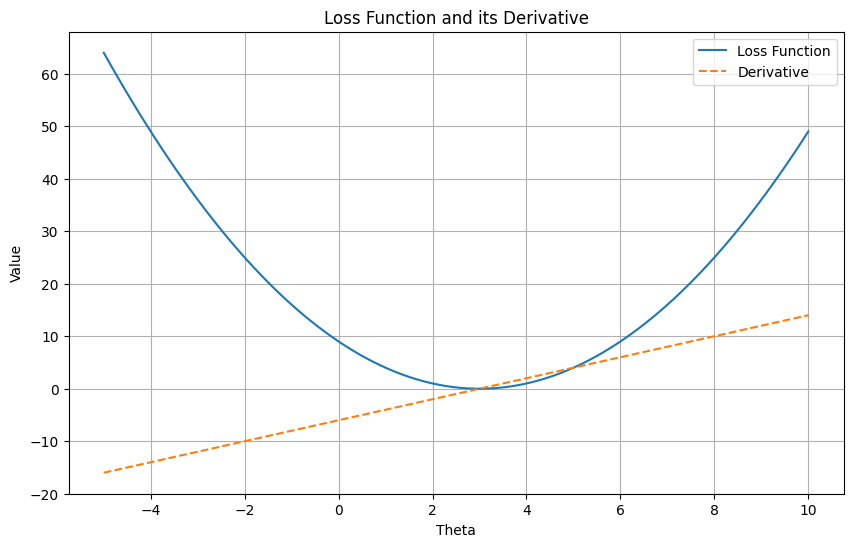

In [3]:
# Define the loss function and its derivative
def loss_function(theta):
    return (theta - 3) ** 2


def derivative_loss_function(theta):
    return 2 * (theta - 3)


# Example theta values
theta_values = np.linspace(-5, 10, 100)
loss_values = loss_function(theta_values)
derivative_values = derivative_loss_function(theta_values)

# Plot the loss function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(theta_values, loss_values, label="Loss Function")
plt.plot(theta_values, derivative_values, label="Derivative", linestyle="--")
plt.xlabel("Theta")
plt.ylabel("Value")
plt.title("Loss Function and its Derivative")
plt.legend()
plt.grid(True)
plt.show()

---

## **3. Implementing Gradient Descent**

### **Basic Gradient Descent Algorithm**

We will now implement gradient descent for the simple quadratic loss function above. We will start at a random value for $\theta$ and iteratively update it using the derivative.


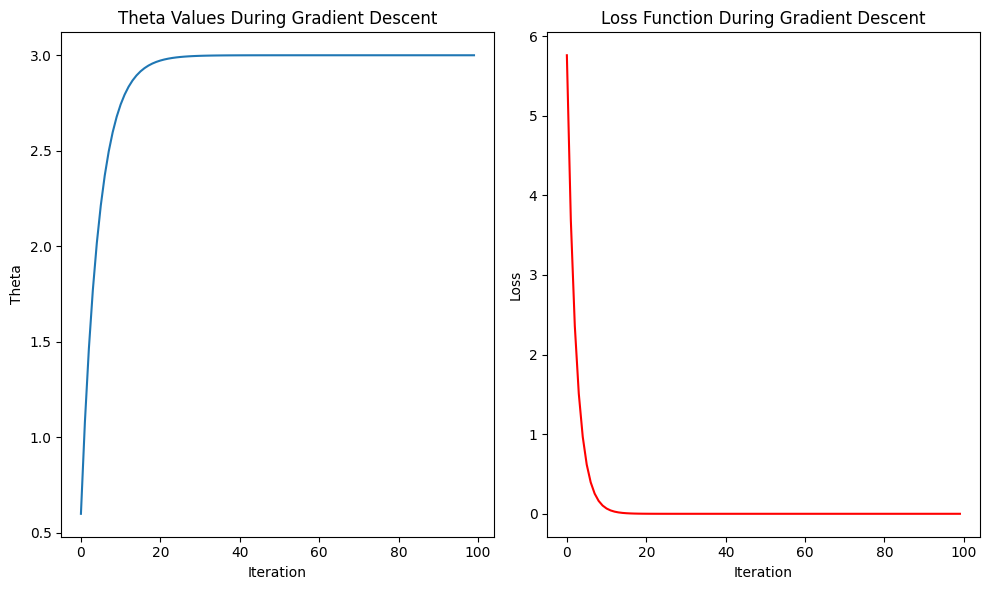

In [4]:
# Gradient Descent Algorithm
def gradient_descent(derivative_fn, initial_theta=0, learning_rate=0.1, num_iterations=100):
    theta = initial_theta  # Initialize theta
    history = []

    for i in range(num_iterations):
        # Calculate the gradient
        gradient = derivative_fn(theta)

        # Update theta
        theta -= learning_rate * gradient

        # Track the value of theta and loss for visualization
        current_loss = loss_function(theta)
        history.append((theta, current_loss))

    return history


# Run Gradient Descent
history = gradient_descent(derivative_loss_function, learning_rate=0.1, num_iterations=100)

# Extract the history of theta and loss
theta_history = [h[0] for h in history]
loss_history = [h[1] for h in history]

# Plot the loss and theta values during gradient descent
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(theta_history, label="Theta Values")
plt.xlabel("Iteration")
plt.ylabel("Theta")
plt.title("Theta Values During Gradient Descent")

plt.subplot(1, 2, 2)
plt.plot(loss_history, label="Loss Values", color="red")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function During Gradient Descent")
plt.tight_layout()
plt.show()

---

### **Key Points:**
- The **theta** values should gradually converge towards 3 (the global minimum).
- The **loss function** should decrease as the algorithm progresses.

---

## **4. Stochastic Gradient Descent (SGD)**

In standard gradient descent, we use the entire dataset to compute the gradient at each step. However, in **Stochastic Gradient Descent (SGD)**, we compute the gradient for a single data point (or a small batch) and update the parameters more frequently.

The update rule for SGD is:

$$
\theta = \theta - \alpha \cdot \frac{\partial L_i}{\partial \theta}
$$

Where:
- $L_i$ is the loss for the $i$-th data point.

### **Example 3: Implementing SGD**

We will modify our previous gradient descent implementation to use **Stochastic Gradient Descent**. Let’s create some simple data points and run SGD.


#### **Generating Synthetic Data**

We'll create a dataset where the target variable `y` is a linear combination of two input features `x1` and `x2`, plus some added noise to simulate real-world data.

$$
y = \theta_1 x_1 + \theta_2 x_2 + b + \text{noise}
$$

Where:
- $\theta_1$ and $\theta_2$ are the weights for the input features.
- $b$ is the bias term.
- $\text{noise}$ adds randomness to the data.


In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the synthetic data
num_samples = 100
input_features = 2
output_features = 1

# True parameters
true_theta = np.array([[2], [3]])  # θ1 = 2, θ2 = 3
true_bias = 1


# Generate random input data
def generate_synthetic_data(n_samples, n_features, theta, bias, noise_std=0.5):
    X = np.random.randn(n_samples, n_features)
    noise = np.random.randn(n_samples, output_features) * noise_std
    y = X @ theta + bias + noise
    return X, y


X, y = generate_synthetic_data(num_samples, input_features, true_theta, true_bias)

print(f"First 5 samples of input features (X):\n{X[:5]}")
print(f"\nFirst 5 samples of target variable (y):\n{y[:5]}")

First 5 samples of input features (X):
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]

First 5 samples of target variable (y):
[[1.75752908]
 [7.14485891]
 [0.370808  ]
 [6.98763084]
 [0.99989667]]


#### **Visualizing the Data in 3D**

With two input features, we can plot the data points in a 3D space where:
- **X-axis:** Feature $ x_1 $
- **Y-axis:** Feature $ x_2 $
- **Z-axis:** Target variable $ y $

This visualization helps in understanding the relationship between the input features and the target variable.

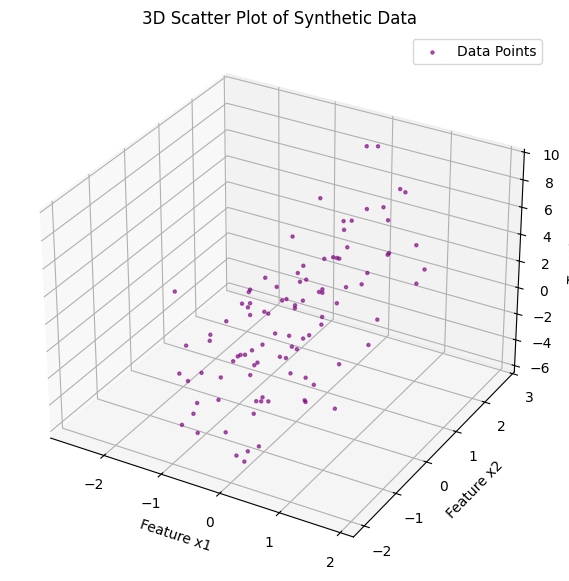

In [6]:
# Create a 3D scatter plot of the data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], y[:, 0], color='purple', marker='.', alpha=0.6, label='Data Points')

# Labels and title
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
ax.set_zlabel('Target y')
ax.set_title('3D Scatter Plot of Synthetic Data')
ax.legend()

plt.show()


**Interpretation:**
- The scatter plot shows how the target variable `y` varies with the two input features `x1` and `x2`.
- A linear relationship is expected due to the data generation formula.
- 
### **Step 2: Implementing and Running the SGD Routine**

Now that we have our data, we'll implement the Stochastic Gradient Descent (SGD) algorithm to find the optimal parameters $\theta_1$, $\theta_2$, and bias $b$ that minimize the Mean Squared Error (MSE) loss function.

Epoch 10/40, Loss: 0.2787
Epoch 20/40, Loss: 0.2787
Epoch 30/40, Loss: 0.2787
Epoch 40/40, Loss: 0.2787


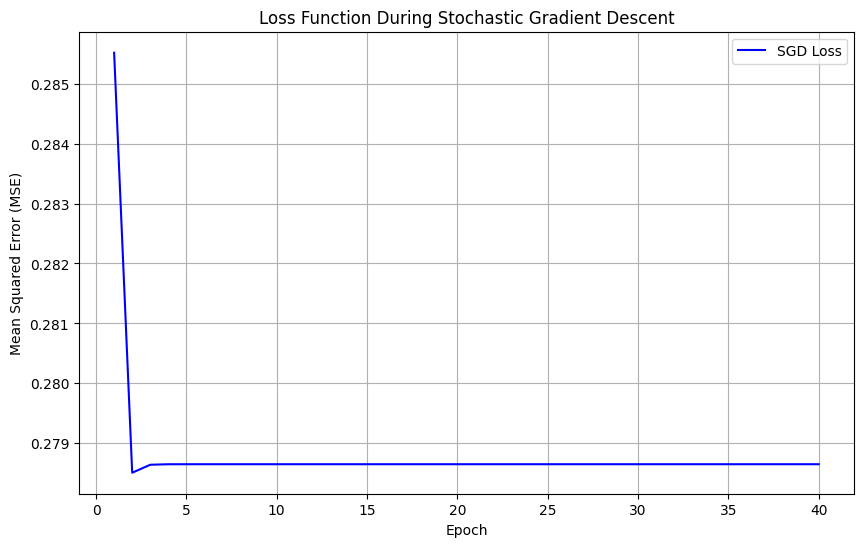

Final theta from SGD: [2.12282585 2.88988971]
Final bias from SGD: 1.0426


In [7]:
# Define the linear regression model
def predict(X, theta, bias):
    return X @ theta + bias


# Define the Mean Squared Error (MSE) loss function
def mse_loss(predictions, y):
    return np.mean((predictions - y) ** 2)


# Define the derivative of the MSE loss function with respect to predictions
def mse_loss_derivative(predictions, y):
    n_samples = y.shape[0]
    return (2 / n_samples) * (predictions - y)


# Define the gradient computation using the separated loss derivative
def compute_gradient(X, y, theta, bias):
    predictions = predict(X, theta, bias)
    error_derivative = mse_loss_derivative(predictions, y)  # Shape: (n_samples, 1)

    # Gradient with respect to theta
    gradient_theta = X.T @ error_derivative  # Shape: (n_features, 1)

    # Gradient with respect to bias
    gradient_bias = np.sum(error_derivative)  # Scalar

    return gradient_theta, gradient_bias


# Stochastic Gradient Descent (SGD) Implementation
def sgd(X, y, learning_rate=0.05, num_epochs=100):
    n_samples, n_features = X.shape

    # Initialize parameters
    theta = np.zeros((n_features, 1))  # Shape: (n_features, 1)
    bias = 0.0
    loss_history = []

    for epoch in range(num_epochs):
        for i in range(n_samples):
            xi = X[i].reshape(1, -1)  # Shape: (1, n_features)
            yi = y[i].reshape(1, -1)  # Shape: (1, 1)

            # Compute prediction
            prediction = predict(xi, theta, bias)  # Shape: (1, 1)

            # Compute error derivative
            error_deriv = mse_loss_derivative(prediction, yi)  # Shape: (1, 1)

            # Compute gradients
            gradient_theta = 2 * xi.T * error_deriv  # Shape: (n_features, 1)
            gradient_bias = 2 * error_deriv  # Shape: (1, 1)

            # Update parameters
            theta -= learning_rate * gradient_theta
            bias -= learning_rate * gradient_bias[0, 0]

        # Compute loss after each epoch
        predictions = predict(X, theta, bias)
        loss = mse_loss(predictions, y)
        loss_history.append(loss)

        # Optional: Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")

    return theta, bias, loss_history


# Stochastic Gradient Descent (SGD) Execution
learning_rate_sgd = 0.01
num_epochs_sgd = 40

final_theta_sgd, final_bias_sgd, loss_history_sgd = sgd(
    X, y, learning_rate=learning_rate_sgd, num_epochs=num_epochs_sgd
)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history_sgd) + 1), loss_history_sgd, label="SGD Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Function During Stochastic Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final theta from SGD: {final_theta_sgd.ravel()}")
print(f"Final bias from SGD: {final_bias_sgd:.4f}")

---

### **Key Points:**
- In **SGD**, the loss will fluctuate more compared to batch gradient descent due to the updates being based on individual data points.
- The **final theta** should still approximate the true value of $\theta = 2$ for the linear regression.

---

## **5. Comparing Batch Gradient Descent and Stochastic Gradient Descent**

In this section, we compare **Batch Gradient Descent** (BGD) and **Stochastic Gradient Descent** (SGD) using a simple linear regression example.

### **Example 4: Compare BGD and SGD on Linear Regression**


BGD Iteration 10/40, Loss: 2.5394
BGD Iteration 20/40, Loss: 0.6423
BGD Iteration 30/40, Loss: 0.3431
BGD Iteration 40/40, Loss: 0.2905

Final theta from Batch Gradient Descent: [1.98500691 2.87896561]
Final bias from Batch Gradient Descent: 1.0055


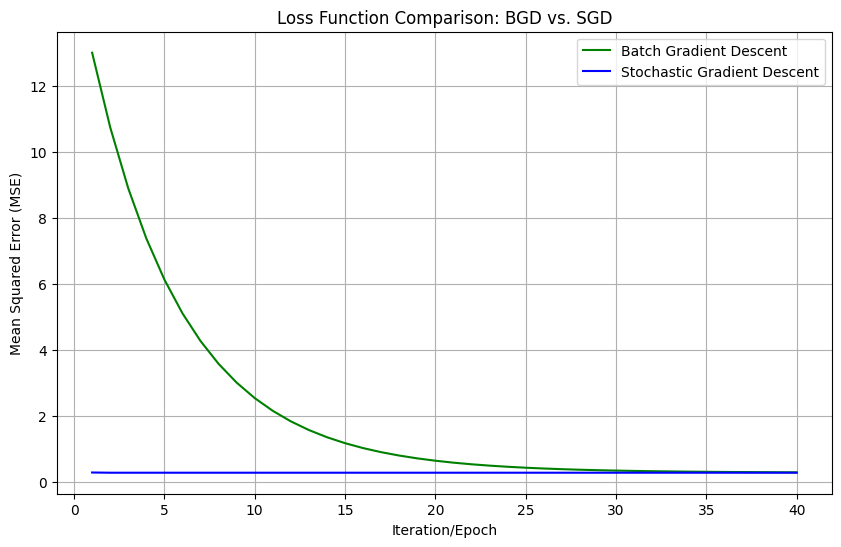


True parameters:
Theta1: 2, Theta2: 3, Bias: 1

Learned parameters via SGD:
Theta1: 2.1228, Theta2: 2.8899, Bias: 1.0426

Learned parameters via BGD:
Theta1: 1.9850, Theta2: 2.8790, Bias: 1.0055


In [8]:
# Linear Regression with Batch Gradient Descent
def batch_gradient_descent(
        X,
        y,
        learning_rate=0.05,
        num_iterations=100
):
    n_samples, n_features = X.shape

    # Initialize parameters
    theta = np.zeros((n_features, 1))  # Shape: (n_features, 1)
    bias = 0.0
    loss_history = []

    for i in range(num_iterations):
        # Compute predictions for the entire dataset
        predictions = predict(X, theta, bias)  # Shape: (n_samples, 1)

        # Compute loss
        loss = mse_loss(predictions, y)
        loss_history.append(loss)

        # Compute gradients
        gradient_theta, gradient_bias = compute_gradient(X, y, theta, bias)

        # Update parameters
        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias

        # Optional: Print loss every 10 iterations
        if (i + 1) % 10 == 0:
            print(f"BGD Iteration {i + 1}/{num_iterations}, Loss: {loss:.4f}")

    return theta, bias, loss_history


# Run Batch Gradient Descent
learning_rate_bgd = 0.05
num_iterations_bgd = 40

final_theta_bgd, final_bias_bgd, loss_history_bgd = batch_gradient_descent(
    X,
    y,
    learning_rate=learning_rate_bgd,
    num_iterations=num_iterations_bgd
)

print(f"\nFinal theta from Batch Gradient Descent: {final_theta_bgd.ravel()}")
print(f"Final bias from Batch Gradient Descent: {final_bias_bgd:.4f}")

# Plot Loss History for both SGD and BGD
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history_bgd) + 1), loss_history_bgd, label="Batch Gradient Descent", color="green")
plt.plot(range(1, len(loss_history_sgd) + 1), loss_history_sgd, label="Stochastic Gradient Descent", color="blue")
plt.xlabel("Iteration/Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Function Comparison: BGD vs. SGD")
plt.legend()
plt.grid(True)
plt.show()

# Compare learned parameters with true parameters
print("\nTrue parameters:")
print(f"Theta1: {true_theta[0, 0]}, Theta2: {true_theta[1, 0]}, Bias: {true_bias}")

print("\nLearned parameters via SGD:")
print(f"Theta1: {final_theta_sgd[0, 0]:.4f}, Theta2: {final_theta_sgd[1, 0]:.4f}, Bias: {final_bias_sgd:.4f}")
print("\nLearned parameters via BGD:")
print(f"Theta1: {final_theta_bgd[0, 0]:.4f}, Theta2: {final_theta_bgd[1, 0]:.4f}, Bias: {final_bias_bgd:.4f}")

### **Key Differences:**
- **Batch Gradient Descent** converges smoothly but can be slower.
- **Stochastic Gradient Descent** converges faster in terms of iterations, but the path is noisier.

---

## **6. Conclusion**

In this notebook, we have covered:
1. **Loss Functions**: How to define and calculate loss functions (e.g., MSE).
2. **Derivatives and Gradients**: The mathematical foundation behind optimization and how gradients guide the optimization process.
3. **Gradient Descent and Stochastic Gradient Descent**: Implementations of both BGD and SGD with numerical examples.
